In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read data

In [2]:
district = pd.read_csv('district.csv')
hotel_distance_to_location = pd.read_csv('hotel_distance_to_location.csv')
hotel_facility = pd.read_csv('hotel_facility.csv')
hotel_location = pd.read_csv('hotel_location.csv')
hotel_map = pd.read_csv('hotel_map.csv')
hotel_price = pd.read_csv('hotel_price.csv')
hotel_price_daily = pd.read_csv('hotel_price_daily.csv')
hotel_quality = pd.read_csv('hotel_quality.csv')
hotel_review = pd.read_csv('hotel_review.csv')
hotel_service = pd.read_csv('hotel_service.csv')
province = pd.read_csv('province.csv')
street = pd.read_csv('street.csv')
rank = pd.read_csv('rank.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
rank.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
rank.T

,0,1,2,3,4,5,6,7,8,9,...,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827
hotel_id,40415,40412,36325,38408,38420,45545,1680,38437,30436,2101,...,34969,46752,46182,46326,46068,45948,45959,37034,47305,47608
name,Premier Residences Phu Quoc Emerald Bay Manage...,Seashells Hotel & Spa Phú Quốc (Seashells Phu ...,Vung Tau RiVa Hotel,Aaron Hotel,Smile Hotel Nha Trang,Green Tree Hotel Phú Quốc,Khách Sạn Senriver (Senriver Hotel),Ibis Styles Nha Trang,Cozrum Homes Trương Định,Sun River Hotel,...,Nam Phuong Home - Lily room in the heart of Hanoi,Homestay Des Amis - Bạn Hữu,Mars House Homestay,OYO 549 Pansy Hotel,Our Houses Hạ Long,Villa Homestay Minh Hieu,Touch Da Nang Hostel,Nancy Thuy Tien Apartment 1009,7S Hotel Oppa Dalat,Anh Đào Homestay
address,"Khem Beach An Thới, Phú Quốc, Kiên Giang","Vo Thi Sau, Dương Đông, Đảo Phú Quốc, Việt Nam","3-5 Thùy Vân Phường 2, Thành Phố Vũng Tàu, Bà ...","Số 6 Trần Quang Khải, Thành Phố Nha Trang, Khá...","45/1 Hùng Vương, Thành Phố Nha Trang, Khánh Hòa","Khu tổ hợp du lịch Sonasea Villas & Resort, Bã...","238 Bạch Đằng, Quận Hải Châu, Đà Nẵng","86 Hùng Vương, Thành Phố Nha Trang, Khánh Hòa","73 Trương Định, Quận 3, Hồ Chí Minh","Số 132-134-136 Bạch Đằng, Quận Hải Châu, Đà Nẵng",...,"Quận Hoàn Kiếm, Hà Nội, Việt Nam","18A Đinh Tiên Hoàng, Tân An, Hội An","1 Quang Trung, P.9, Đà Lạt","65 Củ Chi, Vĩnh Hải, Khánh Hòa, Nha Trang","2A/26A, Anh Đào, Bãi Cháy, Quảng Ninh, Hạ Long","1/6 Lữ Gia, P.9, Lâm Đồng, Đà Lạt","K134/26 Lê Hữu Trác, An Hải Đông, Q.Sơn Trà, Đ...","Thuy Tien Building, 84 Tran Phu, Phường 5, Vũn...","99 Đặng Thái Thân, P.3, Lâm Đồng, Đà Lạt","Lử Chô 2, Lâu Thí Ngài, Bắc Hà, Lào Cai, Bắc Hà"
overall_score_OTA,87.7083,90,91.1111,86,90,94.5,80,88,84,78.0972,...,20,20,20,20,20,20,20,20,20,10
overall_score,88,91,89,86,86,94,83,85,88,80,...,20,20,20,20,20,20,20,20,20,10
score_mean,87.8542,90.5,90.0556,86,88,94.25,81.5,86.5,86,79.0486,...,20,20,20,20,20,20,20,20,20,10
counts_search,818,1691,3561,4591,3583,3750,3514,2585,1713,4770,...,0,0,0,0,0,0,0,0,0,0
counts_click,468,187,200,174,131,213,56,97,198,193,...,0,0,0,0,0,0,0,0,0,0
counts_book,20,22,14,12,15,8,14,12,9,2,...,0,0,0,0,0,0,0,0,0,0
review_score,362,8101.9,37,216.818,766,419.083,2367.6,348,448.833,695,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,0


In [5]:
x = rank[['counts_search']].shape[0]
y = rank[rank['counts_search'] == 0]['counts_search'].count()
print('Percent not search:', 100*y // x, '%')

Percent not search: 82 %


In [6]:
x = rank[['counts_click']].shape[0]
y = rank[rank['counts_click'] == 0]['counts_click'].count()
print('Percent not click:', 100*y // x, '%')

Percent not click: 81 %


In [7]:
x = rank[['counts_book']].shape[0]
y = rank[rank['counts_book'] == 0]['counts_book'].count()
print('Percent not book:', 100*y // x, '%')

Percent not book: 98 %


# Make full table

In [8]:
full = hotel_map[['domain_hotel_id', 'hotel_id']]
full.T

,0,1,2,3,4,5,6,7,8,9,...,9437,9438,9439,9440,9441,9442,9443,9444,9445,9446
domain_hotel_id,10953.0,10960.0,10963.0,10964.0,10966.0,10967.0,10968.0,10969.0,10974.0,10975.0,...,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12
hotel_id,43835.0,9674.0,761.0,1180.0,46671.0,67.0,47363.0,590.0,5092.0,31756.0,...,4.584600e+04,4.626200e+04,4.711700e+04,4.098000e+04,4.588000e+04,4.590400e+04,4.735700e+04,4.704300e+04,4.746200e+04,8.770000e+03


# Merge with rank

In [9]:
full = full.merge(rank, on='hotel_id')
full.drop(['address', 'name'], axis=1, inplace=True)
full.T

,0,1,2,3,4,5,6,7,8,9,...,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018
domain_hotel_id,10953.0,10960.0,10963.0,10964.0,10966.0,10967.0,10968.0,10969.0,10974.0,10975.0,...,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12
hotel_id,43835.0,9674.0,761.0,1180.0,46671.0,67.0,47363.0,590.0,5092.0,31756.0,...,4.580600e+04,4.456700e+04,4.554900e+04,3.631400e+04,3.565500e+04,3.253900e+04,3.583900e+04,3.467900e+04,4.012800e+04,8.770000e+03
overall_score_OTA,85.0,83.0,82.0,92.0,84.0,80.0,73.0,77.0,85.0,81.0,...,8.300000e+01,8.000000e+01,9.500000e+01,8.800000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
overall_score,99.0,67.0,81.0,92.0,84.0,79.0,73.0,75.0,81.0,80.0,...,9.300000e+01,8.000000e+01,9.500000e+01,7.200000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
score_mean,92.0,75.0,81.5,92.0,84.0,79.5,73.0,76.0,83.0,80.5,...,8.800000e+01,8.000000e+01,9.500000e+01,8.000000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
counts_search,0.0,958.0,1954.0,1435.0,321.0,1546.0,0.0,0.0,436.0,0.0,...,1.597000e+03,0.000000e+00,2.427000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_click,2.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.100000e+01,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_book,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
review_score,3553.8,3543.7,2484.9,4600.5,3182.4,626.5,609.7,3049.5,4043.7,2946.9,...,-2.636364e+00,0.000000e+00,0.000000e+00,1.181818e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SCORE,95953.8,88323.7,103724.9,114750.5,90392.4,95586.5,73609.7,79249.5,91403.7,83446.9,...,1.101674e+05,8.000000e+04,1.600700e+05,8.001182e+04,8.800000e+04,8.000000e+04,8.000000e+04,7.900000e+04,9.100000e+04,8.100000e+04


# Merge with facility

In [10]:
hotel_facility.T

,0,1,2,3,4,5,6,7,8,9,...,9437,9438,9439,9440,9441,9442,9443,9444,9445,9446
domain_id,3,5,2,3,4,4,3,3,4,4,...,5,5,3,5,4,3,4,3,5,4
hotel_id_encoded,cbdb0ad9-1f0f-4bfc-992a-200c244e5211,f87a4f85-0aa3-42af-8b3f-f412090e340b,b40a4aeb-63e7-4176-b938-99b9a0997756,3a475052-3d80-4512-8f42-17130dc56e3d,b6aadcde-874c-4644-bdb0-2b4a9eb17367,dafb40d7-31e8-478e-ae0d-d65af0343e87,55979850-45a0-459b-a645-03ee10a01b03,969130ee-9af0-4391-9af8-e492302831aa,95274676-299d-43ca-96ae-85b500b33937,b7a413c6-ffb6-4152-9adc-c239286364d7,...,c404126d-0146-4b3e-a96b-2b568020ded2,66118665-3258-45ed-b55c-7fd97b03d8d9,c41e03fb-a2de-4b46-b829-8e27432223de,89266e83-bdb6-41d5-8f82-c1187a1e012d,52bafd87-38a3-421d-8d6c-faeb63a3f104,54599471-d4e4-4850-9587-bc79392e283a,7dc4686f-c91d-4f56-998d-14681e3e4f95,b651e16b-6d55-48e0-91c9-79d28c056fba,ecd511ba-ccbb-4ce5-a676-5faf920b33b3,28c1c437-0383-47c9-b1f0-bf0174a9569a
currency_exchange,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,0,0,-1,1,-1,1,-1,1,1,-1
room_service_24_hour,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,-1,1,-1,-1,1,-1
elevator,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,-1,-1,-1,-1,0,-1
safely_deposit_boxed,-1,1,1,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,-1,1,-1,-1,0,-1
luggage_storage,-1,1,1,1,-1,-1,-1,-1,-1,-1,...,0,0,-1,1,-1,1,-1,1,1,-1
poolside_bar,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
airport_transfer,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,0,0,-1,0,-1,-1,-1,-1,1,-1
restaurants,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,0,1,-1,0,-1,-1,-1,-1,0,-1


In [11]:
cols = ['currency_exchange',
       'room_service_24_hour', 'elevator', 'safely_deposit_boxed',
       'luggage_storage', 'poolside_bar', 'airport_transfer', 'restaurants',
       'concierge', 'shops', 'meeting_facilities', 'baby_sitting',
       'facilities_for_disabled_guests', 'private_beach', 'front_desk_24_hour',
       'bar', 'laundry_service', 'shuttle_room']
len(cols)

18

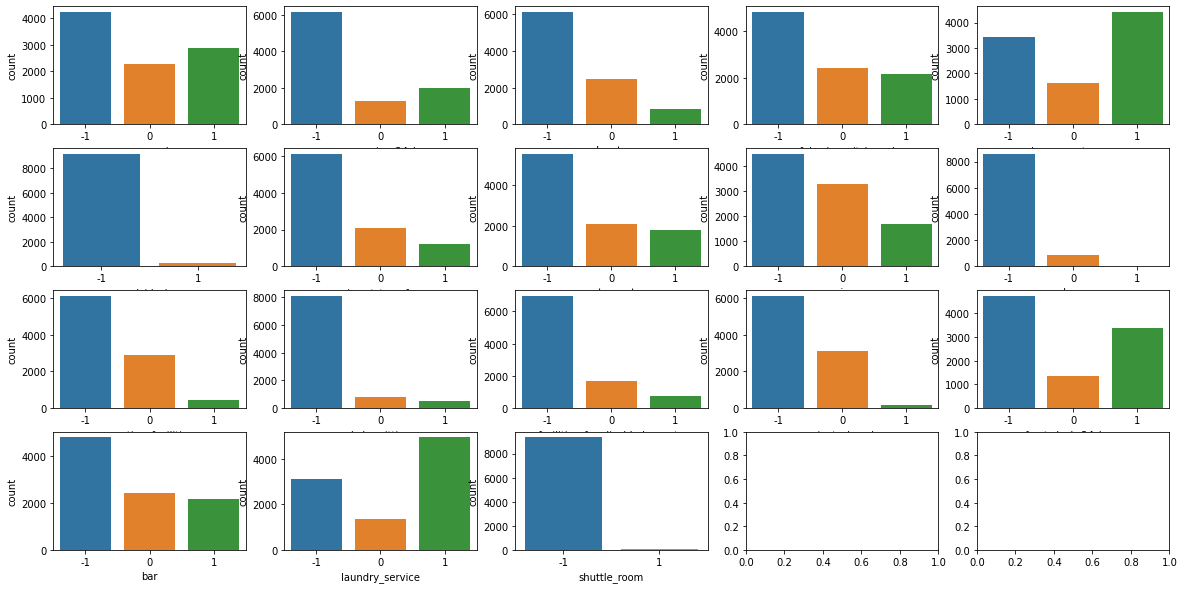

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20,10))
index = 0
for i in range(4):
    for j in range(5):
        if index < len(cols):
            sns.countplot(x = cols[index], data = hotel_facility, ax=ax[i][j])
            index += 1

In [13]:
arr = []
new_cols = []
for col in cols:
    x = hotel_facility[[col]].shape[0]
    y = hotel_facility[hotel_facility[col] == -1][col].count()
    percent = 100*y // x
    string = str(percent) + '% not info of ' + col
    arr.append(string)
    
    if percent <= 40:
        new_cols.append(col)
        
arr.sort()
arr

['33% not info of laundry_service',
 '36% not info of luggage_storage',
 '44% not info of currency_exchange',
 '47% not info of concierge',
 '50% not info of bar',
 '50% not info of front_desk_24_hour',
 '51% not info of safely_deposit_boxed',
 '58% not info of restaurants',
 '64% not info of airport_transfer',
 '64% not info of elevator',
 '64% not info of meeting_facilities',
 '64% not info of private_beach',
 '65% not info of room_service_24_hour',
 '73% not info of facilities_for_disabled_guests',
 '85% not info of baby_sitting',
 '91% not info of shops',
 '97% not info of poolside_bar',
 '98% not info of shuttle_room']

## keep cols >= 60% info

In [14]:
new_cols

['luggage_storage', 'laundry_service']

In [15]:
d = hotel_facility[new_cols]
df = pd.DataFrame(data=d)
df['domain_hotel_id'] = hotel_facility['domain_hotel_id']
df

,luggage_storage,laundry_service,domain_hotel_id
0,-1,-1,8469114
1,1,1,4637296
2,1,1,3000020009707
3,1,1,522902
4,-1,-1,38128872
...,...,...,...
9442,1,1,1200079
9443,-1,-1,19337589
9444,1,1,2417435
9445,1,1,1799047


In [16]:
full_with_fal = full.merge(df, how='left', on='domain_hotel_id')
full_with_fal.T

,0,1,2,3,4,5,6,7,8,9,...,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018
domain_hotel_id,10953.0,10960.0,10963.0,10964.0,10966.0,10967.0,10968.0,10969.0,10974.0,10975.0,...,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12
hotel_id,43835.0,9674.0,761.0,1180.0,46671.0,67.0,47363.0,590.0,5092.0,31756.0,...,4.580600e+04,4.456700e+04,4.554900e+04,3.631400e+04,3.565500e+04,3.253900e+04,3.583900e+04,3.467900e+04,4.012800e+04,8.770000e+03
overall_score_OTA,85.0,83.0,82.0,92.0,84.0,80.0,73.0,77.0,85.0,81.0,...,8.300000e+01,8.000000e+01,9.500000e+01,8.800000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
overall_score,99.0,67.0,81.0,92.0,84.0,79.0,73.0,75.0,81.0,80.0,...,9.300000e+01,8.000000e+01,9.500000e+01,7.200000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
score_mean,92.0,75.0,81.5,92.0,84.0,79.5,73.0,76.0,83.0,80.5,...,8.800000e+01,8.000000e+01,9.500000e+01,8.000000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
counts_search,0.0,958.0,1954.0,1435.0,321.0,1546.0,0.0,0.0,436.0,0.0,...,1.597000e+03,0.000000e+00,2.427000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_click,2.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.100000e+01,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_book,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
review_score,3553.8,3543.7,2484.9,4600.5,3182.4,626.5,609.7,3049.5,4043.7,2946.9,...,-2.636364e+00,0.000000e+00,0.000000e+00,1.181818e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SCORE,95953.8,88323.7,103724.9,114750.5,90392.4,95586.5,73609.7,79249.5,91403.7,83446.9,...,1.101674e+05,8.000000e+04,1.600700e+05,8.001182e+04,8.800000e+04,8.000000e+04,8.000000e+04,7.900000e+04,9.100000e+04,8.100000e+04


# Merge with price

In [17]:
hotel_price.T

,0,1,2,3,4,5,6,7,8,9,...,7250,7251,7252,7253,7254,7255,7256,7257,7258,7259
domain_hotel_id,1.096000e+04,1.096300e+04,1.096400e+04,1.096600e+04,10967.0,10968.0,10969.0,1.097400e+04,10975.0,10981.0,...,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12
mean,1.660457e+06,1.584386e+06,3.575098e+06,1.821575e+06,1073593.0,420779.0,668182.0,1.639424e+06,1813358.0,1974088.0,...,3.690960e+05,1.646676e+06,1.389917e+05,3.492446e+05,2.993963e+05,6.485984e+05,7.639367e+05,2.369014e+05,5.979888e+05,3.100000e+05
min,1.322400e+06,1.363996e+06,3.544128e+06,1.817655e+06,1073593.0,420779.0,668182.0,1.621321e+06,1753247.0,1664769.0,...,3.673840e+05,1.639969e+06,1.343300e+05,3.478730e+05,2.981770e+05,6.460490e+05,7.156250e+05,2.360040e+05,5.953600e+05,2.750000e+05
max,1.740000e+06,1.847474e+06,3.754345e+06,1.824868e+06,1073593.0,420779.0,668182.0,1.660950e+06,1893506.0,2188000.0,...,3.717390e+05,1.657760e+06,1.507050e+05,3.516450e+05,3.014110e+05,6.524060e+05,7.989230e+05,2.383270e+05,6.018160e+05,3.450000e+05


In [18]:
tmp = hotel_map[['hotel_id', 'domain_hotel_id']]
tmp2 = hotel_price[['domain_hotel_id', 'mean']]
tmp = tmp.merge(tmp2, how='left', on='domain_hotel_id')
tmp = tmp[['domain_hotel_id','mean']]
tmp

,domain_hotel_id,mean
0,10953,NaN
1,10960,1.660457e+06
2,10963,1.584386e+06
3,10964,3.575098e+06
4,10966,1.821575e+06
...,...,...
9442,9000000861564,6.485984e+05
9443,9000000862281,7.639367e+05
9444,9000000864662,2.369014e+05
9445,9000000873213,5.979888e+05


In [19]:
full_with_price = full_with_fal.merge(tmp, how='left', on='domain_hotel_id')
full_with_price.rename(columns={'mean': 'price_mean'}, inplace=True)
full_with_price.T

,0,1,2,3,4,5,6,7,8,9,...,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018
domain_hotel_id,10953.0,1.096000e+04,1.096300e+04,1.096400e+04,1.096600e+04,10967.0,10968.0,10969.0,1.097400e+04,10975.0,...,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12
hotel_id,43835.0,9.674000e+03,7.610000e+02,1.180000e+03,4.667100e+04,67.0,47363.0,590.0,5.092000e+03,31756.0,...,4.580600e+04,4.456700e+04,4.554900e+04,3.631400e+04,3.565500e+04,3.253900e+04,3.583900e+04,3.467900e+04,4.012800e+04,8.770000e+03
overall_score_OTA,85.0,8.300000e+01,8.200000e+01,9.200000e+01,8.400000e+01,80.0,73.0,77.0,8.500000e+01,81.0,...,8.300000e+01,8.000000e+01,9.500000e+01,8.800000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
overall_score,99.0,6.700000e+01,8.100000e+01,9.200000e+01,8.400000e+01,79.0,73.0,75.0,8.100000e+01,80.0,...,9.300000e+01,8.000000e+01,9.500000e+01,7.200000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
score_mean,92.0,7.500000e+01,8.150000e+01,9.200000e+01,8.400000e+01,79.5,73.0,76.0,8.300000e+01,80.5,...,8.800000e+01,8.000000e+01,9.500000e+01,8.000000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
counts_search,0.0,9.580000e+02,1.954000e+03,1.435000e+03,3.210000e+02,1546.0,0.0,0.0,4.360000e+02,0.0,...,1.597000e+03,0.000000e+00,2.427000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_click,2.0,1.000000e+00,1.000000e+00,1.900000e+01,0.000000e+00,0.0,0.0,1.0,0.000000e+00,0.0,...,3.100000e+01,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_book,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
review_score,3553.8,3.543700e+03,2.484900e+03,4.600500e+03,3.182400e+03,626.5,609.7,3049.5,4.043700e+03,2946.9,...,-2.636364e+00,0.000000e+00,0.000000e+00,1.181818e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SCORE,95953.8,8.832370e+04,1.037249e+05,1.147505e+05,9.039240e+04,95586.5,73609.7,79249.5,9.140370e+04,83446.9,...,1.101674e+05,8.000000e+04,1.600700e+05,8.001182e+04,8.800000e+04,8.000000e+04,8.000000e+04,7.900000e+04,9.100000e+04,8.100000e+04


# Merge with service

In [20]:
hotel_service.T

,0,1,2,3,4,5,6,7,8,9,...,9436,9437,9438,9439,9440,9441,9442,9443,9444,9445
domain_id,2,2,3,2,5,5,2,3,3,5,...,4,2,5,3,2,3,3,3,4,3
hotel_id_encoded,f3a3af32-514c-426b-9837-c2eb0bba1227,86bb96d4-3927-40a3-ad66-cfaf7bec4d68,d77888ea-37b1-4f8e-86a8-f7b7f4b1996c,b1968212-4eb8-4c5a-a3e2-79a13b62bd5d,c115b28b-e1b1-49f3-af09-4256030210f0,f76ce3b0-59c1-4284-b61d-4af3f3c7dee6,c804857b-85ed-40da-be2c-f6fbe584acce,68e972e0-0afd-474e-9fc6-4e954d530356,aec87c81-acca-4c52-a6f0-b76a780ba3a9,8b7d1752-e709-4c96-9f1f-9471571cf2fb,...,5bf61522-767f-4e6b-83d3-e06b3136e88f,bdbed5da-164d-4113-89ac-ef697e08f7e1,a77ba786-4c2b-4204-a6b0-ad22bb33a8ae,3392459b-4e97-4d89-bb59-19813cb8bed9,91a9a840-242c-4c9b-86ea-48a1955305b8,a7bc7072-86be-4927-abbf-6e91774684fe,b52b0b8e-ea90-444b-b1e1-12f4f41e35e1,a4429302-b85f-4b79-a824-7254d5933ef0,aa7ef3f3-b705-4d40-8d91-484768c82ea2,6dc35543-8331-41ca-98a8-d21913731f5a
tours,0,1,1,0,1,0,0,1,1,0,...,-1,1,1,1,0,-1,1,-1,-1,-1
night_club,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
relax_spa,0,1,1,0,0,0,0,-1,-1,0,...,-1,0,0,-1,0,-1,-1,-1,-1,-1
relax_massage,-1,-1,-1,-1,1,0,-1,-1,-1,0,...,-1,-1,0,-1,-1,-1,-1,-1,-1,1
relax_steam_room,0,0,-1,0,-1,-1,0,-1,-1,-1,...,-1,0,-1,-1,0,-1,-1,-1,-1,-1
relax_outdoor_room,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
relax_outdoor_pool,0,0,-1,0,-1,-1,0,-1,-1,-1,...,-1,0,-1,-1,0,-1,-1,-1,-1,-1
relax_sauna,0,0,-1,0,-1,-1,0,-1,-1,-1,...,-1,0,-1,-1,0,-1,-1,-1,-1,-1


In [21]:
cols =['tours', 'night_club', 'relax_spa',
       'relax_massage', 'relax_steam_room', 'relax_outdoor_room',
       'relax_outdoor_pool', 'relax_sauna', 'relax_pool']
len(cols)

9

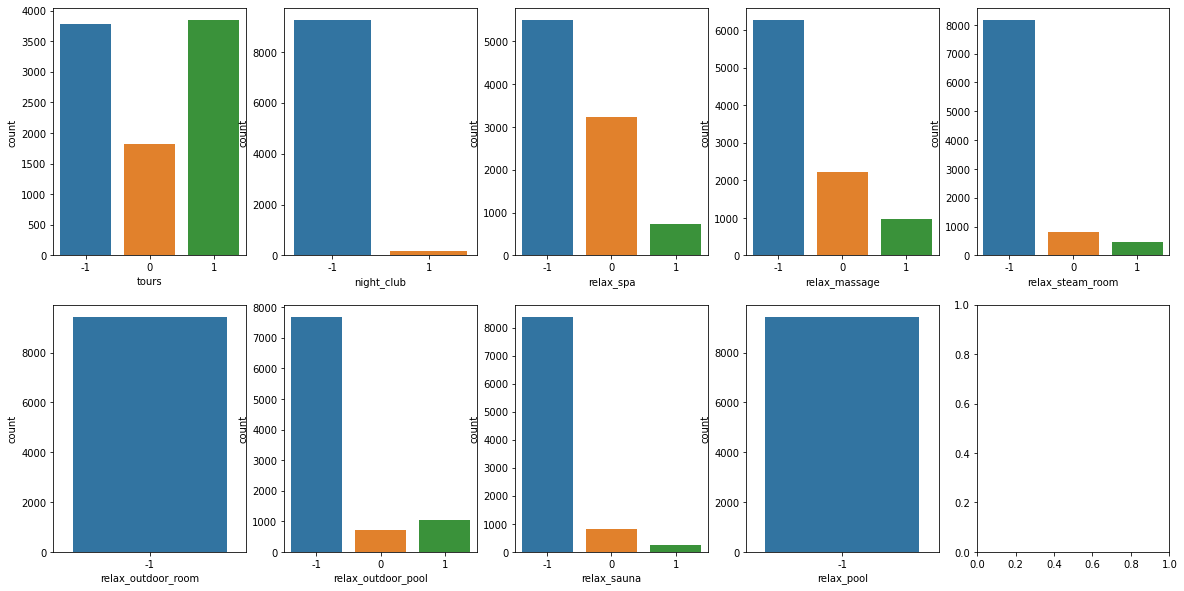

In [22]:
nrows=2
ncols=5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
index = 0
for i in range(nrows):
    for j in range(ncols):
        if index < len(cols):
            sns.countplot(x = cols[index], data = hotel_service, ax=ax[i][j])
            index += 1

In [23]:
arr = []
new_cols = []
for col in cols:
    x = hotel_service[[col]].shape[0]
    y = hotel_service[hotel_service[col] == -1][col].count()
    percent = 100*y // x
    string = str(percent) + '% not info of ' + col
    arr.append(string)
    
    if percent <= 40:
        new_cols.append(col)
        
arr.sort()
arr

['100% not info of relax_outdoor_room',
 '100% not info of relax_pool',
 '40% not info of tours',
 '58% not info of relax_spa',
 '66% not info of relax_massage',
 '81% not info of relax_outdoor_pool',
 '86% not info of relax_steam_room',
 '88% not info of relax_sauna',
 '97% not info of night_club']

## keep cols >= 60% info

In [24]:
new_cols

['tours']

In [25]:
tmp = hotel_service[['domain_hotel_id','tours']]
full_with_serv = full_with_price.merge(tmp, how='left', on='domain_hotel_id')
full_with_serv.T

,0,1,2,3,4,5,6,7,8,9,...,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018
domain_hotel_id,10953.0,1.096000e+04,1.096300e+04,1.096400e+04,1.096600e+04,10967.0,10968.0,10969.0,1.097400e+04,10975.0,...,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12
hotel_id,43835.0,9.674000e+03,7.610000e+02,1.180000e+03,4.667100e+04,67.0,47363.0,590.0,5.092000e+03,31756.0,...,4.580600e+04,4.456700e+04,4.554900e+04,3.631400e+04,3.565500e+04,3.253900e+04,3.583900e+04,3.467900e+04,4.012800e+04,8.770000e+03
overall_score_OTA,85.0,8.300000e+01,8.200000e+01,9.200000e+01,8.400000e+01,80.0,73.0,77.0,8.500000e+01,81.0,...,8.300000e+01,8.000000e+01,9.500000e+01,8.800000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
overall_score,99.0,6.700000e+01,8.100000e+01,9.200000e+01,8.400000e+01,79.0,73.0,75.0,8.100000e+01,80.0,...,9.300000e+01,8.000000e+01,9.500000e+01,7.200000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
score_mean,92.0,7.500000e+01,8.150000e+01,9.200000e+01,8.400000e+01,79.5,73.0,76.0,8.300000e+01,80.5,...,8.800000e+01,8.000000e+01,9.500000e+01,8.000000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
counts_search,0.0,9.580000e+02,1.954000e+03,1.435000e+03,3.210000e+02,1546.0,0.0,0.0,4.360000e+02,0.0,...,1.597000e+03,0.000000e+00,2.427000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_click,2.0,1.000000e+00,1.000000e+00,1.900000e+01,0.000000e+00,0.0,0.0,1.0,0.000000e+00,0.0,...,3.100000e+01,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_book,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
review_score,3553.8,3.543700e+03,2.484900e+03,4.600500e+03,3.182400e+03,626.5,609.7,3049.5,4.043700e+03,2946.9,...,-2.636364e+00,0.000000e+00,0.000000e+00,1.181818e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SCORE,95953.8,8.832370e+04,1.037249e+05,1.147505e+05,9.039240e+04,95586.5,73609.7,79249.5,9.140370e+04,83446.9,...,1.101674e+05,8.000000e+04,1.600700e+05,8.001182e+04,8.800000e+04,8.000000e+04,8.000000e+04,7.900000e+04,9.100000e+04,8.100000e+04


# Merge with review

In [26]:
# hotel_review.T

In [27]:
# cols = ['domain_hotel_id', 'review_id',
#         'title', 'text', 'travel_purpose','emotion']
# hotel_review[cols].T

In [28]:
# hotel_review['travel_purpose'].describe()

# Balance the data

In [29]:
full = full_with_serv
full.T

,0,1,2,3,4,5,6,7,8,9,...,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018
domain_hotel_id,10953.0,1.096000e+04,1.096300e+04,1.096400e+04,1.096600e+04,10967.0,10968.0,10969.0,1.097400e+04,10975.0,...,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12,9.000001e+12
hotel_id,43835.0,9.674000e+03,7.610000e+02,1.180000e+03,4.667100e+04,67.0,47363.0,590.0,5.092000e+03,31756.0,...,4.580600e+04,4.456700e+04,4.554900e+04,3.631400e+04,3.565500e+04,3.253900e+04,3.583900e+04,3.467900e+04,4.012800e+04,8.770000e+03
overall_score_OTA,85.0,8.300000e+01,8.200000e+01,9.200000e+01,8.400000e+01,80.0,73.0,77.0,8.500000e+01,81.0,...,8.300000e+01,8.000000e+01,9.500000e+01,8.800000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
overall_score,99.0,6.700000e+01,8.100000e+01,9.200000e+01,8.400000e+01,79.0,73.0,75.0,8.100000e+01,80.0,...,9.300000e+01,8.000000e+01,9.500000e+01,7.200000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
score_mean,92.0,7.500000e+01,8.150000e+01,9.200000e+01,8.400000e+01,79.5,73.0,76.0,8.300000e+01,80.5,...,8.800000e+01,8.000000e+01,9.500000e+01,8.000000e+01,8.800000e+01,8.000000e+01,8.000000e+01,7.900000e+01,9.100000e+01,8.100000e+01
counts_search,0.0,9.580000e+02,1.954000e+03,1.435000e+03,3.210000e+02,1546.0,0.0,0.0,4.360000e+02,0.0,...,1.597000e+03,0.000000e+00,2.427000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_click,2.0,1.000000e+00,1.000000e+00,1.900000e+01,0.000000e+00,0.0,0.0,1.0,0.000000e+00,0.0,...,3.100000e+01,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
counts_book,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
review_score,3553.8,3.543700e+03,2.484900e+03,4.600500e+03,3.182400e+03,626.5,609.7,3049.5,4.043700e+03,2946.9,...,-2.636364e+00,0.000000e+00,0.000000e+00,1.181818e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SCORE,95953.8,8.832370e+04,1.037249e+05,1.147505e+05,9.039240e+04,95586.5,73609.7,79249.5,9.140370e+04,83446.9,...,1.101674e+05,8.000000e+04,1.600700e+05,8.001182e+04,8.800000e+04,8.000000e+04,8.000000e+04,7.900000e+04,9.100000e+04,8.100000e+04


# Handle missing value

In [30]:
full.isna().sum()

domain_hotel_id         0
hotel_id                0
overall_score_OTA       0
overall_score           0
score_mean              0
counts_search           0
counts_click            0
counts_book             0
review_score            0
SCORE                   0
luggage_storage         0
laundry_service         0
price_mean           2093
tours                   1
dtype: int64

In [31]:
full.loc[full['tours'].isna(), 'tours'] = -1

In [32]:
full.isna().sum()

domain_hotel_id         0
hotel_id                0
overall_score_OTA       0
overall_score           0
score_mean              0
counts_search           0
counts_click            0
counts_book             0
review_score            0
SCORE                   0
luggage_storage         0
laundry_service         0
price_mean           2093
tours                   0
dtype: int64

# To csv

In [33]:
# full.to_csv('full.csv')

In [34]:
# rank.head(10).to_csv('top10_name.csv')

In [35]:
# cp top10_name.csv /home/luongnv/Documents/DataScience/Project-Tripi/implement/structure/tripi/src/data/cleaned/

# Rating Prediction

# Click Prediction